<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.6: Sentiment Analysis
INSTRUCTIONS:
- Run the cells
- Observe and understand the results
- Answer the questions

Based on the video tutorial **Text Classification with Machine Learning,SpaCy and Scikit(Sentiment Analysis)** by **Jesse E. Agbe (JCharis)**.

## Data Source: UCI
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

### Dataset
- [Sentiment Labelled Sentences Data Set](http://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences)

### Abstract
The dataset contains sentences labelled with positive or negative sentiment.

- Data Set Characteristics: Text
- Number of Instances: 3000
- Area: N/A
- Attribute Characteristics: N/A
- Number of Attributes: N/A
- Date Donated: 2015-05-30
- Associated Tasks: Classification
- Missing Values? N/A
- Number of Web Hits: 102584

### Source
Dimitrios Kotzias dkotzias '@' ics.uci.edu

### Data Set Information
This dataset was created for the Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015

Please cite the paper if you want to use it :)

It contains sentences labelled with positive or negative sentiment.

### Format
sentence &lt;tab&gt; score &lt;newline&gt;

### Details
Score is either 1 (for positive) or 0 (for negative)

The sentences come from three different websites/fields:
- imdb.com
- amazon.com
- yelp.com

For each website, there exist **500 positive** and **500 negative** sentences. Those were selected randomly for larger datasets of reviews.

We attempted to select sentences that have a clearly positive or negative connotaton, the goal was for no neutral sentences to be selected.

For the full datasets look:

- **imdb**: Maas et. al., 2011 _Learning word vectors for sentiment analysis_
- **amazon**: McAuley et. al., 2013 _Hidden factors and hidden topics: Understanding rating dimensions with review text_
- **yelp**: [Yelp dataset challenge](http://www.yelp.com/dataset_challenge)


### Attribute Information
The attributes are text sentences, extracted from reviews of products, movies, and restaurants

### Relevant Papers
**From Group to Individual Labels using Deep Features**, Kotzias et. al,. KDD 2015

### Citation Request
**From Group to Individual Labels using Deep Features**, Kotzias et. al,. KDD 2015

## Import libraries

In [85]:
## Import Libraries
import pandas as pd

import regex as re
import spacy

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import warnings
warnings.filterwarnings('ignore')

## Load data

Load Yelp, Amazon and Imdb Data.

Hint: Source is separated by **tabs** and has no headers.

In [86]:
yelp_file = 'yelp_labelled.txt'
imdb_file = 'imdb_labelled_fixed.txt'
amazon_file = 'amazon_cells_labelled.txt'

# ANSWER
with open(yelp_file, 'r') as f:
    yelp_text = f.read()
    
with open(imdb_file, 'r') as f:
    imdb_text = f.read()
    
with open(amazon_file, 'r') as f:
    amazon_text = f.read()
    

In [87]:
print(yelp_file)

yelp_labelled.txt


## Inspect the data

Check your datasets.

In [88]:
# ANSWER
print(yelp_text)


Wow... Loved this place.	1
Crust is not good.	0
Not tasty and the texture was just nasty.	0
Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.	1
The selection on the menu was great and so were the prices.	1
Now I am getting angry and I want my damn pho.	0
Honeslty it didn't taste THAT fresh.)	0
The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.	0
The fries were great too.	1
A great touch.	1
Service was very prompt.	1
Would not go back.	0
The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.	0
I tried the Cape Cod ravoli, chicken,with cranberry...mmmm!	1
I was disgusted because I was pretty sure that was human hair.	0
I was shocked because no signs indicate cash only.	0
Highly recommended.	1
Waitress was a little slow in service.	0
This place is not worth your time, let alone Vegas.	0
did not like at all.	0
The Burrittos Blah!	0
The food, amazin

In [89]:
print(imdb_text)


A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  	0
Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  	0
Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  	0
Very little music or anything to speak of.  	0
The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  	1
The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  	0
Wasted two hours.  	0
Saw the movie today and thought it was a good effort, good messages for kids.  	1
A bit predictable.  	0
Loved the casting of Jimmy Buffet as the science teacher.  	1
And those baby owls were adorable.  	1
The movie showed a lot of Florida at it's best, made it look very appealing.  	1
The Songs Were The Best And The M

In [90]:
print(amazon_text)

So there is no way for me to plug it in here in the US unless I go by a converter.	0
Good case, Excellent value.	1
Great for the jawbone.	1
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!	0
The mic is great.	1
I have to jiggle the plug to get it to line up right to get decent volume.	0
If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.	0
If you are Razr owner...you must have this!	1
Needless to say, I wasted my money.	0
What a waste of money and time!.	0
And the sound quality is great.	1
He was very impressed when going from the original battery to the extended battery.	1
If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.	0
Very good quality though	1
The design is very odd, as the ear "clip" is not very comfortable at all.	0
Highly recommend for any one who has a blue tooth phone.	1
I advise EVERYONE DO NOT BE FOOLED!	0
So Far So G

In [91]:
df_yelp = pd.read_csv('yelp_labelled.txt', header = None, sep = '\t')
df_imdb = pd.read_csv('imdb_labelled_fixed.txt', header = None, sep = '\t') # New version of imdb file without double quotes
df_amazon = pd.read_csv('amazon_cells_labelled.txt', header = None, sep = '\t')
dfs = {'yelp': df_yelp, 'imdb': df_imdb, 'amazon': df_amazon}

In [92]:
df_yelp.sample(5)

,0,1
920,"Needless to say, I won't be going back anytime...",0
121,"Worst service to boot, but that is the least o...",0
426,This is some seriously good pizza and I'm an e...,1
931,If you want to wait for mediocre food and down...,0
61,This place receives stars for their APPETIZERS!!!,1


In [93]:
df_imdb.shape

(1000, 2)

In [94]:
df_imdb.sample(5)

,0,1
146,The fish is badly made and some of its underwa...,0
321,There is a brilliant twist ending.,1
335,It was a very superficial movie and it gave me...,0
393,Having to humour him just to get by and get th...,1
953,"Just whatever you do, avoid Groove as its the ...",0


In [95]:
df_amazon.shape

(1000, 2)

In [96]:
df_amazon.sample(5)

,0,1
530,Keep up the good work Amazon!!,1
335,1. long lasting battery (you don't have to rec...,0
245,Worth every penny.,1
685,Easy to pair with my Samsung Cell.,1
166,Doesn't work at all.. I bougth it for my L7c a...,0


In [97]:
type(dfs)

dict

In [98]:
for ds in dfs.keys():
    print('Dataset: %s [%d row(s) x %d col(s)]' % (ds, dfs[ds].shape[0], dfs[ds].shape[1]))
    dfs[ds].columns = ['text', 'sentiment']
    dfs[ds]['source'] = ds
    print(dfs[ds].head())
    print('-' * 75)

Dataset: yelp [1000 row(s) x 2 col(s)]
                                                text  sentiment source
0                           Wow... Loved this place.          1   yelp
1                                 Crust is not good.          0   yelp
2          Not tasty and the texture was just nasty.          0   yelp
3  Stopped by during the late May bank holiday of...          1   yelp
4  The selection on the menu was great and so wer...          1   yelp
---------------------------------------------------------------------------
Dataset: imdb [1000 row(s) x 2 col(s)]
                                                text  sentiment source
0  A very, very, very slow-moving, aimless movie ...          0   imdb
1  Not sure who was more lost - the flat characte...          0   imdb
2  Attempting artiness with black & white and cle...          0   imdb
3       Very little music or anything to speak of.            0   imdb
4  The best scene in the movie was when Gerardo i...          1  

## Merge the data

Merge all three datasets.

In [99]:
#df = pd.concat(dfs.values(), ignore_index = True)

In [100]:
dframe = [df_yelp, df_imdb, df_amazon]

In [101]:
merged = pd.concat(dframe)

In [102]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 999
Data columns (total 3 columns):
text         3000 non-null object
sentiment    3000 non-null int64
source       3000 non-null object
dtypes: int64(1), object(2)
memory usage: 93.8+ KB


## Export the data

Export merged datasets to as csv file.

In [103]:
# ANSWER

merged.to_csv('sentiments.csv', index = None)

## Prepare the stage
- Load spaCy

In [104]:
nlp = spacy.load('en_core_web_sm')

## Prepare the text
All the text handling and preparation concerned with the changes and modifications from the raw source text to a format that will be used for the actual processing, things like:
- handle encoding
- handle extraneous and international charaters
- handle simbols
- handle metadata and embeded information
- handle repetitions (such multiple spaces or newlines)

Clean text.

In [105]:
def clean_text(text):
    # reduce multiple spaces and newlines to only one
    text = re.sub(r'(\s\s+|\n\n+)', r'\1', text)
    # remove double quotes
    text = re.sub(r'"', '', text)

    return text

In [106]:
# ANSWER
merged['text'] = merged['text'].apply(clean_text)

## Work the text
Concern with the meaning and the substance of the content to extract actual information.

Hint: Use techniques learned in previous labs. Remove StopWords, Punctuation, Lemmatize etc.

In [107]:
def convert_text(text):
    sent = nlp(text)
    ents = {x.text: x for x in sent.ents}
    tokens = []
    for w in sent:
        if w.is_stop or w.is_punct or w.is_digit:
            continue
        if w.text in ents:
            tokens.append(w.text)
        else:
            tokens.append(w.lemma_.lower())
    text = ' '.join(tokens)
    return text

In [108]:
%%time
merged['short'] = merged['text'].apply(convert_text)

Wall time: 25.4 s


In [109]:
merged.sample(10)

,text,sentiment,source,short
624,Pretty awesome place.,1,yelp,pretty awesome place
263,"Conceptually, the show offers a little bit of ...",1,imdb,conceptually offer little bit everything- ever...
468,I find this inexcusable and so will probably b...,0,amazon,find inexcusable probably return phone change ...
616,My friend did not like his Bloody Mary.,0,yelp,friend like bloody mary
407,I couldn't take them seriously.,0,imdb,seriously
751,"The wontons were thin, not thick and chewy, al...",1,yelp,wonton thin thick chewy melt mouth
44,Excellent bluetooth headset.,1,amazon,excellent bluetooth headset
388,This is a disgrace.,0,yelp,disgrace
891,Their rotating beers on tap is also a highligh...,1,yelp,rotate beer tap highlight place
580,"This was reflected not only in the cast, but a...",0,imdb,reflect cast par script borrow early classic


In [110]:
merged

,text,sentiment,source,short
0,Wow... Loved this place.,1,yelp,wow love place
1,Crust is not good.,0,yelp,Crust good
2,Not tasty and the texture was just nasty.,0,yelp,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,yelp,stop late bank holiday rick steve recommendati...
4,The selection on the menu was great and so wer...,1,yelp,selection menu great price
...,...,...,...,...
995,The screen does get smudged easily because it ...,0,amazon,screen smudge easily touch ear face
996,What a piece of junk.. I lose more calls on th...,0,amazon,piece junk lose call phone
997,Item Does Not Match Picture.,0,amazon,item match picture
998,The only thing that disappoint me is the infra...,0,amazon,thing disappoint infra red port irda


In [ ]:
# from nltk.corpus import stopwords
# nltk.download('stopwords')
# from nltk.tokenize import word_tokenize
# text_tokens = wrd_tokenize(data)
# tokens_no_stop = [word for word in text_tokens if not word in stopwords.words()] # create a list of tokens withOUT the stop words 

In [ ]:
# tokens_no_stop

In [ ]:
# !pip install --upgrade gensim

In [74]:
# from gensim.parsing.preprocessing import remove_stopwords

# result = remove_stopwords(output)
# print(result)

In [ ]:
# from gensim.parsing.preprocessing import strip_punctuation2

# result2 = strip_punctuation2(result)
# print(result2)

In [ ]:
# from gensim.parsing.preprocessing import stem_text
# result3 = stem_text(result2)
# print(result3)

In [ ]:
# from gensim.parsing.preprocessing import strip_numeric
# result4 = strip_numeric(result3)
# print(result4)

In [ ]:
# type(result4)

In [ ]:
# myText = open('dataUpdated.txt','w')
# myString = result4
# myText.write(myString)
# myText.close()

In [ ]:
# df = pd.read_csv('dataUpdated.txt', sep=" ")

## Modelling

In [111]:
# helper function to show results and charts
def show_summary_report(actual, prediction, probabilities):
    
    # If actual labels is a Series, extract the array
    if isinstance(actual, pd.Series):
        actual = actual.values
    # If actual and/or prediction labels are strings, convert to integers
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(int)
        
    # Calculate model evaluation metrics
    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, probabilities)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Plot Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Plot Precision/Recall curve
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # Plot ROC curve
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

In [112]:
# Features and Labels
X = merged['short']
y = merged['sentiment']

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [113]:
X

0                                         wow love place
1                                             Crust good
2                                    tasty texture nasty
3      stop late bank holiday rick steve recommendati...
4                             selection menu great price
                             ...                        
995                  screen smudge easily touch ear face
996                           piece junk lose call phone
997                                   item match picture
998                 thing disappoint infra red port irda
999                                answer call unit work
Name: short, Length: 3000, dtype: object

## Use Bag-of-Words

In [114]:
# create a matrix of word counts from the text
counts = CountVectorizer()

In [115]:
# do the actual counting
A = counts.fit_transform(X_train, y_train)

In [116]:
# create a classifier using SVC
pd.DataFrame(A.todense(), columns=counts.get_feature_names()).head()

,00,10,11,13,15,15pm,17,20th,2mp,30,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
classifier = SVC(kernel='linear', probability=True)

In [118]:
# train the classifier with the training data
classifier.fit(A.toarray(), y_train)

SVC(kernel='linear', probability=True)

In [119]:
# do the transformation for the test data
# NOTE: use `transform()` instead of `fit_transform()`
B = counts.transform(X_test)

In [121]:
# make predictions based on the test data
predictions = classifier.predict(B.todense())

# store probabilities of predictions being 1
probabilities = classifier.predict_proba(B.todense())[:, 1]

In [122]:
# check the accuracy
print('Accuracy: %.4f' % accuracy_score(y_test, predictions))

Accuracy: 0.7833


Accuracy : 0.7833 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7959 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7697 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7835                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


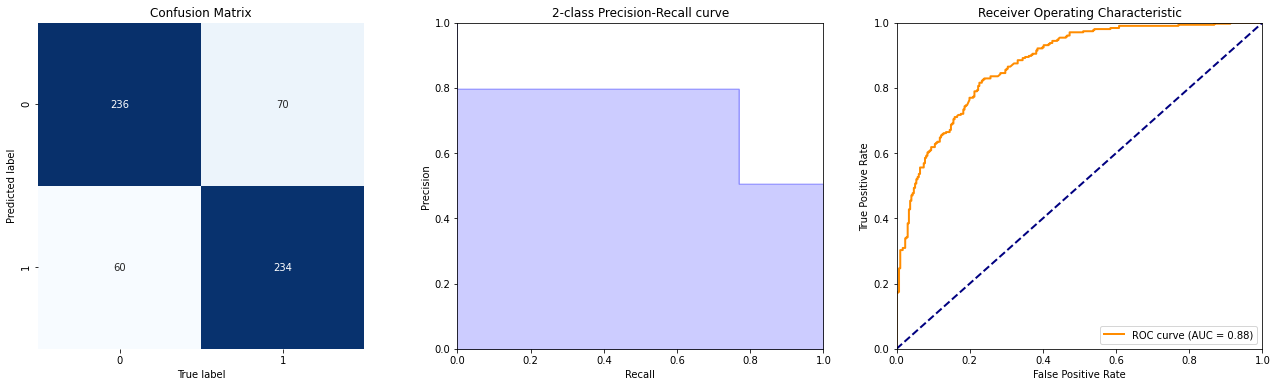

(0.7833333333333333,
 0.7959183673469388,
 0.7697368421052632,
 0.7835170697012803)

In [123]:
show_summary_report(y_test, predictions, probabilities)

## Repeat using TF-IDF
TF-IDF = Term Frequency - Inverse Document Frequency

In [125]:
# create a matrix of word counts from the text
# use TF-IDF
tfidf = TfidfVectorizer()
# do the actual counting
A = tfidf.fit_transform(X_train, y_train)

# train the classifier with the training data
classifier.fit(A.toarray(), y_train)

# do the transformation for the test data
# NOTE: use `transform()` instead of `fit_transform()`
B = tfidf.transform(X_test)

# make predictions based on the test data
predictions = classifier.predict(B.todense())

# store probabilities of predictions being 1
probabilities = classifier.predict_proba(B.todense())[:, 1]

# check the accuracy
print('Accuracy: %.4f' % accuracy_score(y_test, predictions))

Accuracy: 0.7783


Accuracy : 0.7783 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7879 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7697 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7784                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


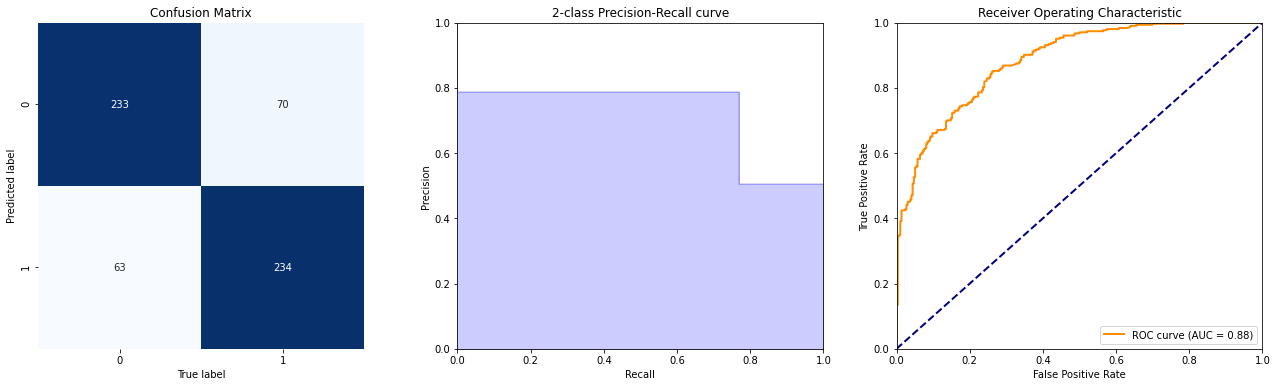

(0.7783333333333333,
 0.7878787878787878,
 0.7697368421052632,
 0.7784495021337128)

In [126]:
show_summary_report(y_test, predictions, probabilities)

## Repeating it all for comparision
Repeating the whole lot in one big block

Find 'Accuracy', 'Precision', 'Recall', 'ROC_AUC' using CountVectorizer and TfidfVectorizer and keep the result in a dataframe.

*********
* Count *
*********
Accuracy : 0.7833 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7959 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7697 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7835                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


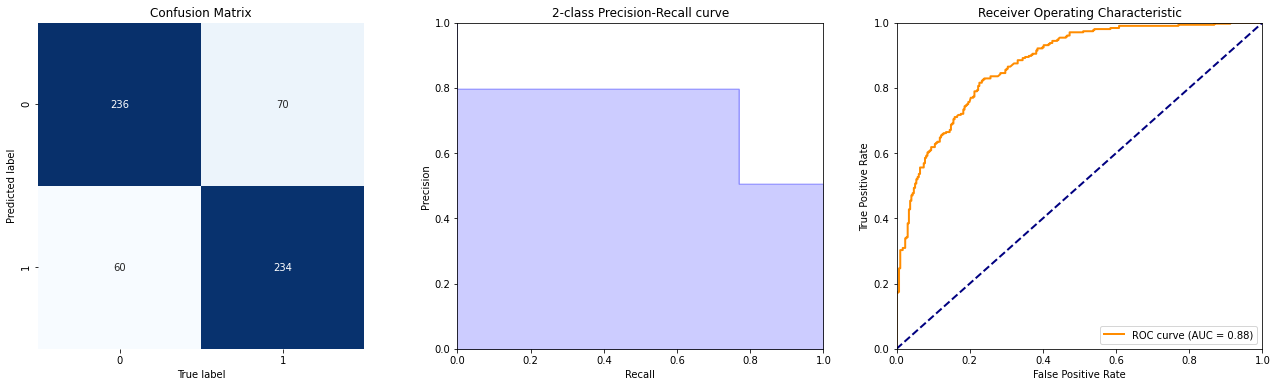

**********
* TF-IDX *
**********
Accuracy : 0.7783 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7879 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7697 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7784                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


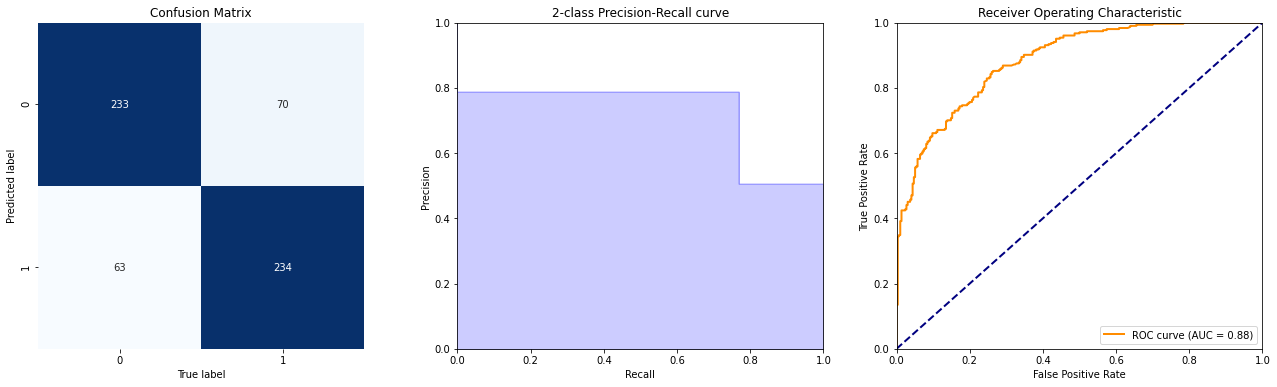

In [127]:
# ANSWER

# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'ROC_AUC'])

models = ['Count', 'TF-IDX']
for i, m in enumerate([CountVectorizer(), TfidfVectorizer()]):
    print('*' * (len(models[i]) + 4))
    print('* %s *' % models[i])
    print('*' * (len(models[i]) + 4))
    
    # create a matrix of word counts from the text
    counts = m
    # do the actual counting
    A = counts.fit_transform(X_train, y_train)

    # create a classifier using SVC
    classifier = SVC(kernel='linear', probability=True)

    # train the classifier with the training data
    classifier.fit(A.toarray(), y_train)

    # do the transformation for the test data
    # NOTE: use `transform()` instead of `fit_transform()`
    B = counts.transform(X_test)

    # make predictions based on the test data
    predictions = classifier.predict(B.todense())

    # store probabilities of predictions being 1
    probabilities = classifier.predict_proba(B.todense())[:, 1]

    # show the report
    accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predictions, probabilities)
    # keep the results
    results.loc[i] = {'Model': models[i], 
                      'Accuracy': accuracy_, 
                      'Precision': precision_,
                      'Recall': recall_,
                      'ROC_AUC': roc_auc_}
    



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



